<a href="https://colab.research.google.com/github/tirtha2016/EDA_Capstone_project/blob/main/EDA_capstone_project__Google__playstore_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## **Loading the dataset after mounting the drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ps = pd.read_csv('/content/drive/MyDrive/capestone project google play store analysis/Play Store Data.csv')

In [ ]:
df_rev = pd.read_csv('/content/drive/MyDrive/capestone project google play store analysis/User Reviews.csv')


##**First we print the number of rows and columns**

In [ ]:
df_ps.shape

(10841, 13)

In [ ]:
df_rev.shape

(64295, 5)

In [ ]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_ps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [ ]:
df_ps.head(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up


In [ ]:
df_ps.tail(8)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
df_ps.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
df_rev.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

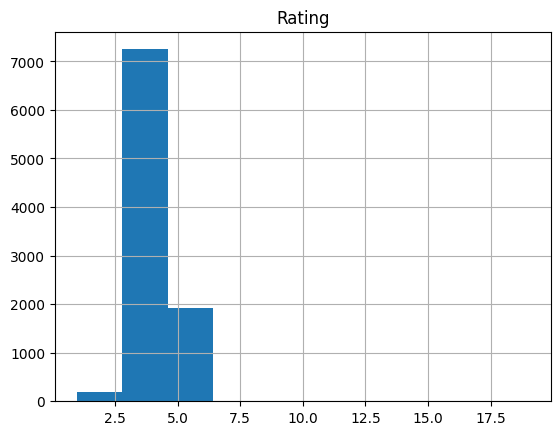

In [ ]:
df_ps.hist()

**MISSING VALUES**

Count the number of missing values in the dataframe

In [ ]:
df_ps.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_ps.isnull().any()

App               False
Category          False
Rating             True
Reviews           False
Size              False
Installs          False
Type               True
Price             False
Content Rating     True
Genres            False
Last Updated      False
Current Ver        True
Android Ver        True
dtype: bool

**Checking how many ratings are more than 5**

In [ ]:
df_ps[df_ps.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# Dropping the row here
df_ps.drop([10472],inplace = True)

In [ ]:
#printing the rows from 10470 to 10475
df_ps[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


<Axes: >

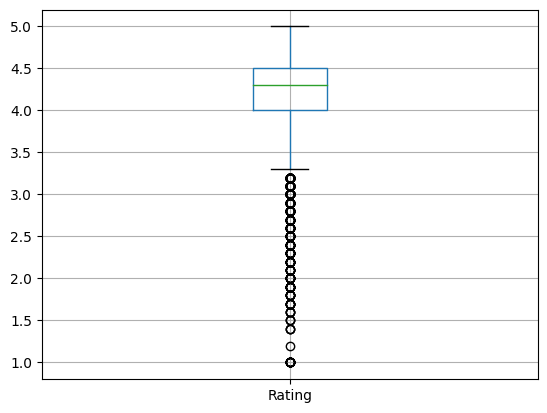

In [ ]:
df_ps.boxplot()

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

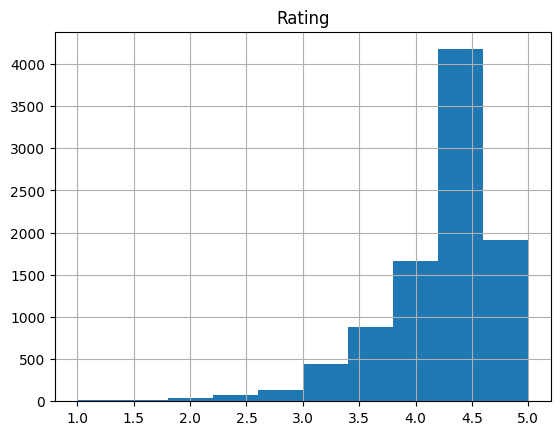

In [ ]:
df_ps.hist()

**If in any column 90% of data is missing, we drop the column. Since this is not the case with our data, we don't drop any column**

In [ ]:
df_ps.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

## **Then, we check for number of NaN values in each column**

In [ ]:
df_ps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df_ps.shape

(10840, 13)

**Data Manipulation: filling in the Null values**

Filling the Null values with the appropriate values using aggregate functions such as Mean,Median,Mode

In [ ]:
# We then define a finction to fill in the null values
def insert_median(col):
  return col.fillna(col.median())

In [ ]:
df_ps.Rating = df_ps['Rating'].transform(insert_median) #since we have aorund 1400 null values

In [ ]:
# We count the number of values in each column
df_ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [ ]:
# We fill the other columns' null values with mode of column values
#In this cell we calculate the mode
print(df_ps['Type'].mode())
print(df_ps['Current Ver'].mode())
print(df_ps['Android Ver'].mode())

0    Free
Name: Type, dtype: object
0    Varies with device
Name: Current Ver, dtype: object
0    4.1 and up
Name: Android Ver, dtype: object


In [ ]:
# Filling the missing column values with Mode
df_ps['Type'].fillna(str(df_ps['Type'].mode().values[0]),inplace=True)
df_ps['Current Ver'].fillna(str(df_ps['Current Ver'].mode().values[0]),inplace=True)
df_ps['Android Ver'].fillna(str(df_ps['Android Ver'].mode().values[0]),inplace=True)

In [ ]:
# Counting the number of null values in each column
# Here we see that the null values have been replaced in each columns, hence the 0s
df_ps.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [ ]:
# Taking a look at our dataset
df_ps.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
# converting desired column's values to numerical from string 
df_ps['Reviews'] = pd.to_numeric(df_ps['Reviews'],errors='coerce')
df_ps['Price'] = df_ps['Price'].apply(lambda x : str(x).replace('$','') if '$' in str(x) else str(x))
df_ps['Price'] = df_ps['Price'].apply(lambda x : float(x))


In [ ]:
df_ps['Installs'] = df_ps['Installs'].apply(lambda x : str(x).replace('+','') if '+' in str(x) else str(x))
df_ps['Installs'] = df_ps['Installs'].apply(lambda x : str(x).replace(',','') if ',' in str(x) else str(x))
df_ps['Installs'] = df_ps['Installs'].apply(lambda x : float(x))

In [ ]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# sneak peek into some important values of the columns after changing them into numeric
df_ps.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# We group by categories to compare category with 'Rating'.'Price' and 'Reviews' individually, one at a time
grp = df_ps.groupby('Category')
processed_csv=df_ps.to_csv('Gf.csv', index = True)
a = grp['Rating'].agg(np.mean) #mean of 'Rating' column
b = grp['Price'].agg(np.sum) #mean of 'Price column
c = grp['Reviews'].agg(np.mean) #mean of 'Reviews' column
print(a)
print(b)
print(c)

Category
ART_AND_DESIGN         4.355385
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335498
BUSINESS               4.182391
COMICS                 4.160000
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204564
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.207059
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328827
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.080071
TRAVEL_AND_LOCAL       4.132946

**Data Visualization**

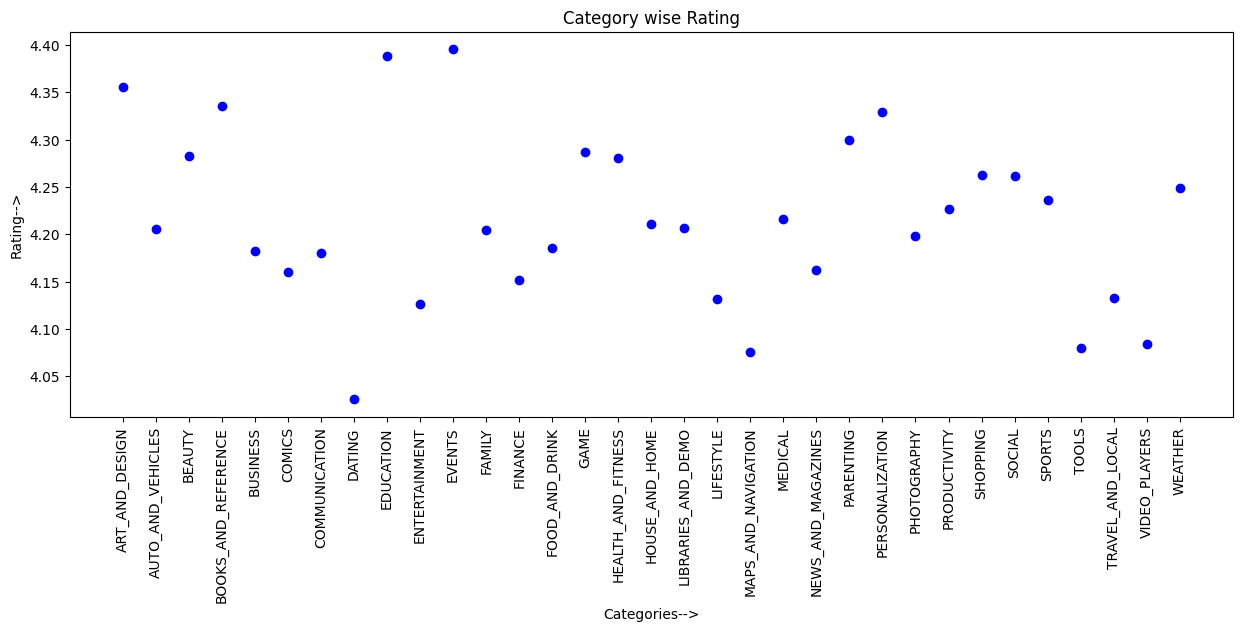

In [ ]:
#Comparing Category with Rating
plt.figure(figsize=(15,5))
plt.plot(a,'bo')
plt.xticks(rotation = 90)
plt.title('Category wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show()

*FROM THE ABOVE PLOT WE CAN INFER WHICH CATEGORY OF APPS HAVE THE HIGHEST RATINGS. WE SEE THAT EDUCATION AND EVENTS APPS HAVE THE HIGHEST RATINGS*

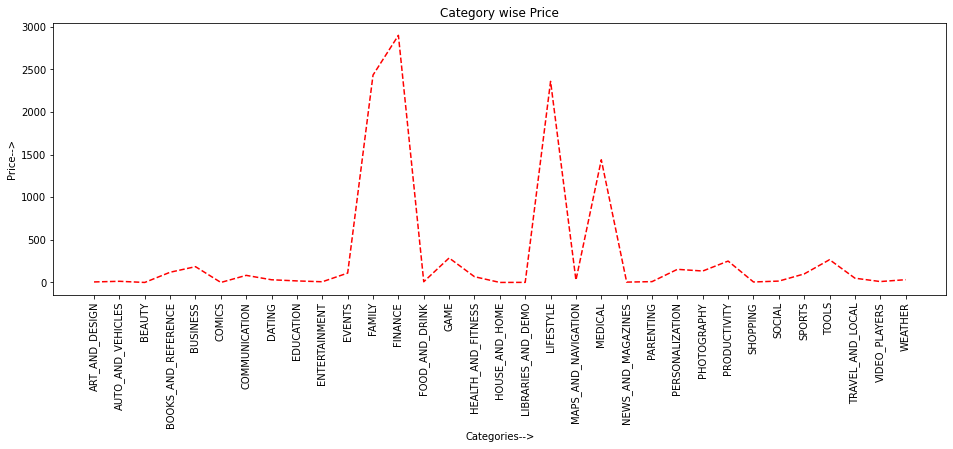

In [ ]:
#Comparing category with price
plt.figure(figsize=(16,5))
plt.plot(b,'r--',color='r')
plt.xticks(rotation=90)
plt.title('Category wise Price')
plt.xlabel('Categories-->')
plt.ylabel('Price-->')
plt.show()

ABOVE PLOT TELLS US THAT FAMILY AND FINANCE CATEGORY APPLICATIONS ARE MORE EXPENSIVE THAN OTHERS

/usr/local/lib/python3.8/dist-packages/IPython/core/pylabtools.py:128: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


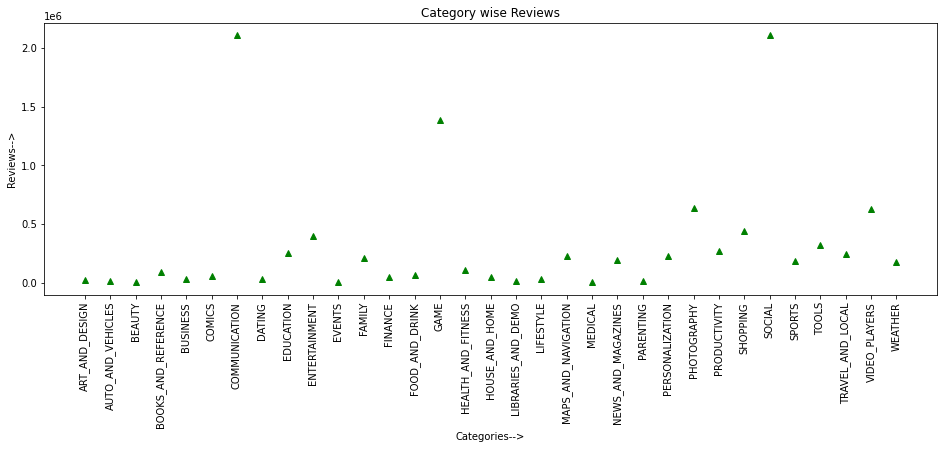

In [ ]:
#Comparing category with Reviews
plt.figure(figsize=(16,5))
plt.plot(c,'g^',color='G')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

FROM THE ABOVE PLOT WE CAN INFER THAT COMMUNICATION AND SOCIAL APPS ARE MOST REVIEWD BY THE MASS OF PUBLIC COMPARED TO OTHERS

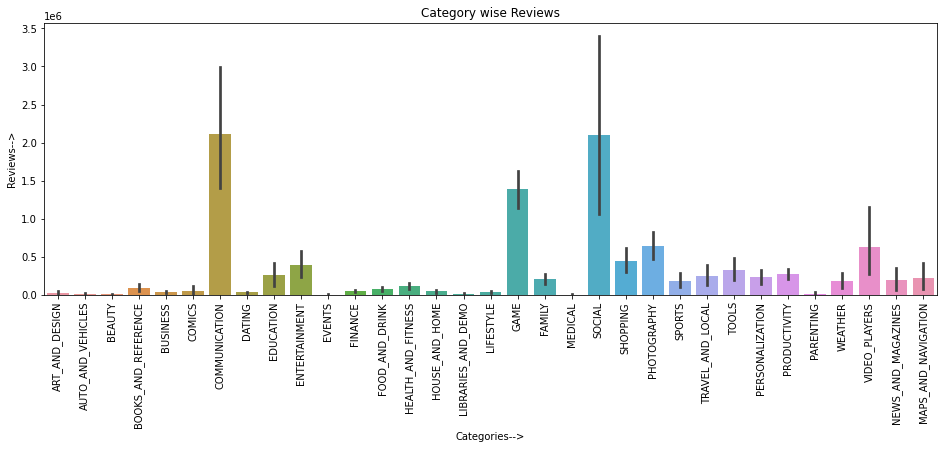

In [ ]:
plt.figure(figsize=(16,5))
sns.barplot(x=df_ps['Category'],y=df_ps['Reviews'])
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show()

It would be interesting to find out the distribution of the Ratings , Reviews and Price separately. We can see that **Ratings is postively skewed, whereas Reviews and Price are heavily skewed to the left hand side**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

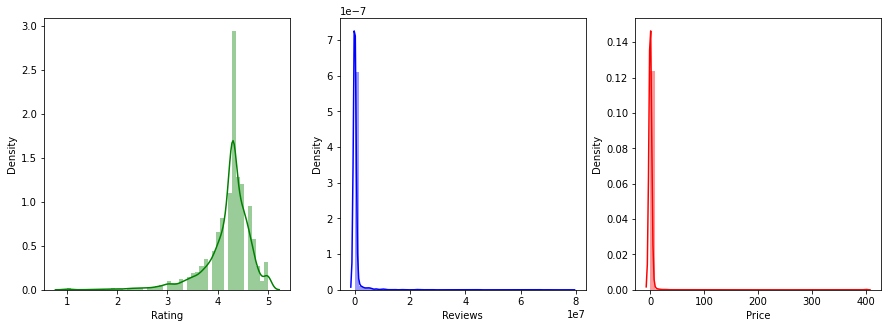

In [ ]:

f,(ax1,ax2,ax3) = plt.subplots(ncols=3,sharey=False)
sns.distplot(df_ps['Rating'],hist=True,color='g',ax=ax1)
sns.distplot(df_ps['Reviews'],hist=True,color='b',ax=ax2)
sns.distplot(df_ps['Price'],hist=True,color='r',ax=ax3)
f.set_size_inches(15, 5)

**We can see that most of the Ratings are between 4 and around 4.5 and 5**

**As far as Reviews are concerned,most of the count of the reviews are around 0**

**Also for Price,most of the Apps are Free as we can see this from the third plot**

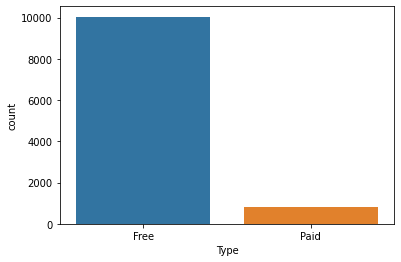

In [ ]:
sns.countplot(x='Type',data=df_ps)

**Free apps are more used than the paid ones**

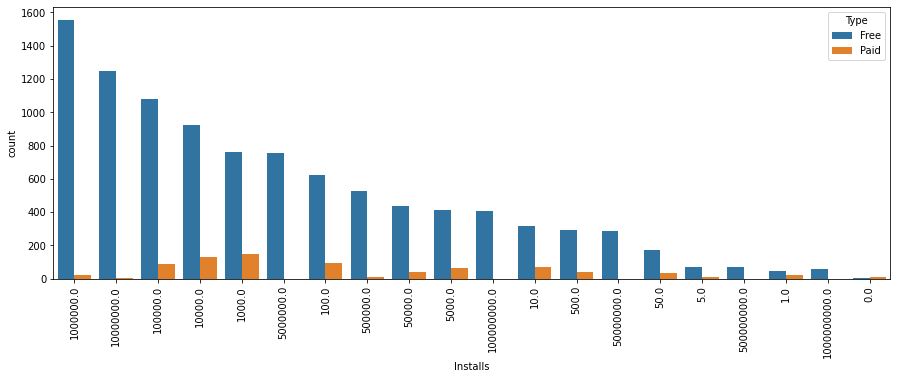

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.countplot(x = 'Installs',hue='Type',data=df_ps,ax=ax1,order=df_ps['Installs'].value_counts().index)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

We can see that the free apps are more installed than the paid versions

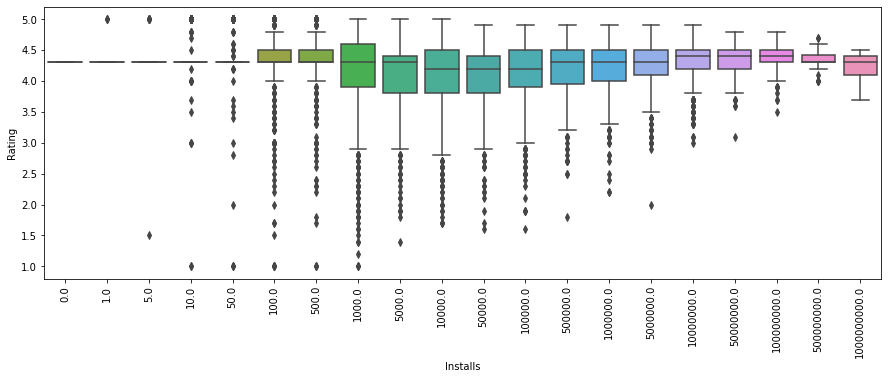

In [ ]:
f,ax1 = plt.subplots(ncols=1)
sns.boxplot(x = 'Installs',y='Rating',data=df_ps)
plt.xticks(rotation=90)
f.set_size_inches(15,5)

The above plot shows that the median of ratings lie between 4.0 to 4.5 for all number of installs.

Contrary to the common thinking that more rating means more installs, we see the plot below which shows that there is no such relation between the two parameters

**From the below plot, we cannot say that there is a relation, it seems that irrespective of the Reviews, the ratings are majorly between 4 and 5**, which we also noticed before


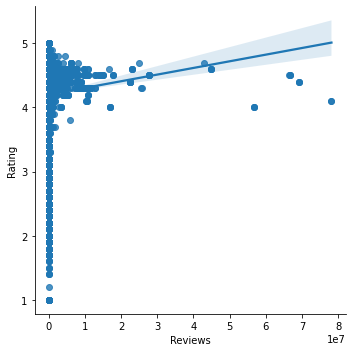

In [ ]:
g = sns.lmplot(x = 'Reviews',y='Rating',data=df_ps)

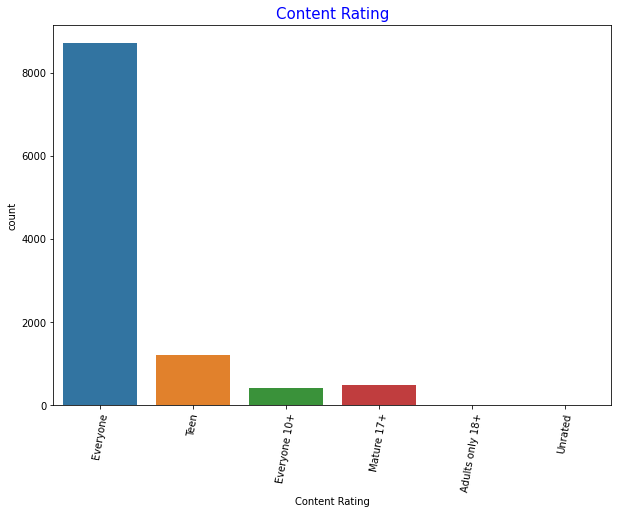

In [ ]:
#Then we analyze the content rating. We see the counts of content ratings for different age categories
plt.figure(figsize=(10,7))
sns.countplot(data=df_ps, x='Content Rating')
plt.xticks(rotation=80)
plt.title('Content Rating',color = 'blue',fontsize=15)
plt.show()

**Category**

In [ ]:
#unique() method shows us the unique values in a Pandas series
df_ps['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

**Rating**

In [ ]:
df_ps['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [ ]:
df_ps['Rating'].dtype

dtype('float64')

**Reviews**

In [ ]:
df_ps[df_ps['Reviews']=='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df_ps['Reviews'] = df_ps.Reviews.replace("0.0",0)
df_ps['Reviews'] = df_ps.Reviews.replace("3.0M",3000000.0)
df_ps['Reviews'] = df_ps['Reviews'].astype(float)
df_ps['Reviews'].dtype

dtype('float64')

**Size**

In [ ]:
df_ps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [ ]:
df_ps['Size'] = df_ps.Size.replace("Varies with device",np.nan)
df_ps['Size'] = df_ps.Size.str.replace("M","000")
df_ps['Size'] = df_ps.Size.str.replace("k","")
df_ps['Size'] = df_ps.Size.replace("1,000+",1000)
df_ps['Size'] =df_ps['Size'].astype(float)
df_ps['Size'].dtype

dtype('float64')

In [ ]:
df_ps['Size'].unique()

array([1.90e+04, 1.40e+04, 8.70e+00, 2.50e+04, 2.80e+00, 5.60e+00,
       2.90e+04, 3.30e+04, 3.10e+00, 2.80e+04, 1.20e+04, 2.00e+04,
       2.10e+04, 3.70e+04, 2.70e+00, 5.50e+00, 1.70e+04, 3.90e+04,
       3.10e+04, 4.20e+00, 7.00e+00, 2.30e+04, 6.00e+00, 6.10e+00,
       4.60e+00, 9.20e+00, 5.20e+00, 1.10e+04, 2.40e+04,      nan,
       9.40e+00, 1.50e+04, 1.00e+04, 1.20e+00, 2.60e+04, 8.00e+00,
       7.90e+00, 5.60e+04, 5.70e+04, 3.50e+04, 5.40e+04, 2.01e+02,
       3.60e+00, 5.70e+00, 8.60e+00, 2.40e+00, 2.70e+04, 2.50e+00,
       1.60e+04, 3.40e+00, 8.90e+00, 3.90e+00, 2.90e+00, 3.80e+04,
       3.20e+04, 5.40e+00, 1.80e+04, 1.10e+00, 2.20e+00, 4.50e+00,
       9.80e+00, 5.20e+04, 9.00e+00, 6.70e+00, 3.00e+04, 2.60e+00,
       7.10e+00, 3.70e+00, 2.20e+04, 7.40e+00, 6.40e+00, 3.20e+00,
       8.20e+00, 9.90e+00, 4.90e+00, 9.50e+00, 5.00e+00, 5.90e+00,
       1.30e+04, 7.30e+04, 6.80e+00, 3.50e+00, 4.00e+00, 2.30e+00,
       7.20e+00, 2.10e+00, 4.20e+04, 7.30e+00, 9.10e+00, 5.50e

**Installs**

In [ ]:
df_ps['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [ ]:
df_ps['Installs'] = df_ps.Installs.replace("Free",np.nan)
df_ps['Installs'] = df_ps['Installs'].astype(float)
df_ps['Installs'].dtype

dtype('float64')

In [ ]:
df_ps['Installs'] = pd.to_numeric(df_ps['Installs'])

**Price**

In [ ]:
df_ps['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df_ps['Price'] = pd.to_numeric(df_ps['Price'])

In [ ]:
df_ps['Price'].dtype

dtype('float64')

**After rigorous churning, mining and wrangling of the dataset, we can come to some useful conclusions about our data and gain prominient insights and answers to some serious qusetions**

# **1. What are the top categories as per the analysis?**

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df_ps['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [ ]:

y = df_ps['Category'].value_counts().index
x = df_ps['Category'].value_counts()
xaxsis = []
yaxsis = []
for i in range(len(x)):
    xaxsis.append(x[i])
    yaxsis.append(y[i])

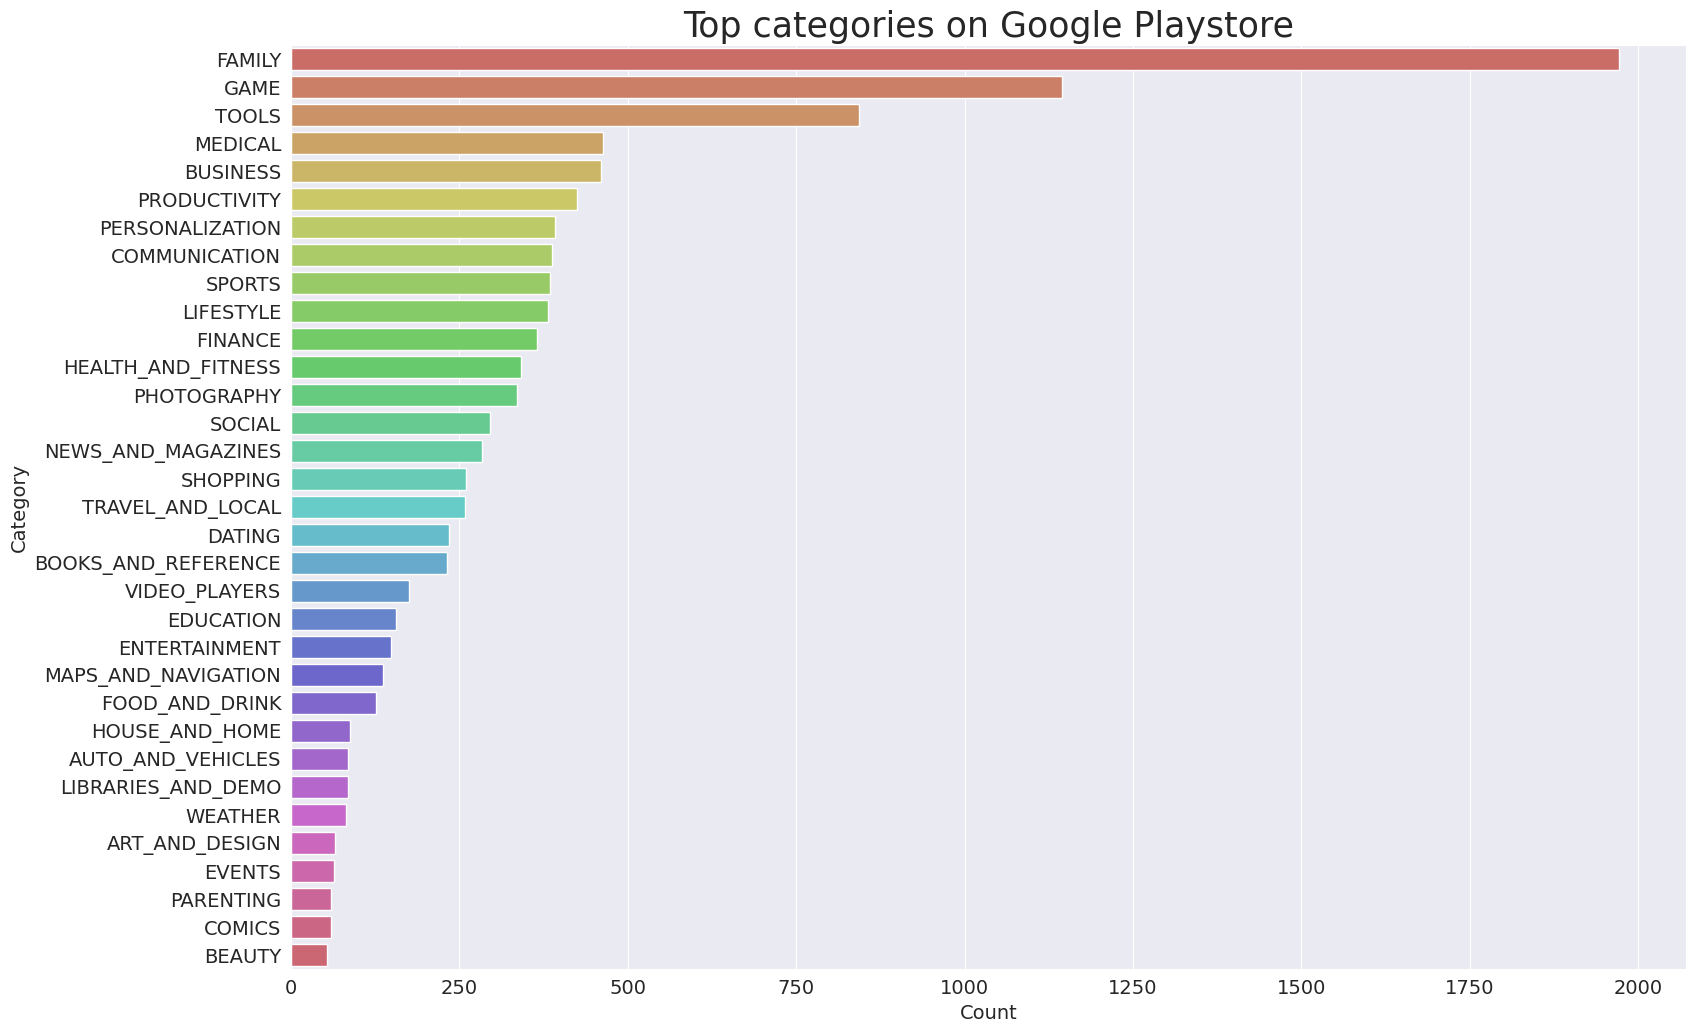

In [ ]:
plt.figure(figsize=(18,12))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xaxsis, y = yaxsis, palette= "hls")
graph.set_title("Top categories on Google Playstore", fontsize = 25);

**Note**: Out of the 33 categories in our dataset. family and gaming take the spotlight while beauty category remains behind in the race

## **2. As per content rating, which apps are ahead?**

In [ ]:
x = df_ps['Content Rating'].value_counts().index
y = df_ps['Content Rating'].value_counts()

xaxis = []
yaxis = []
for i in range(len(x)):
    xaxis.append(x[i])
    yaxis.append(y[i])

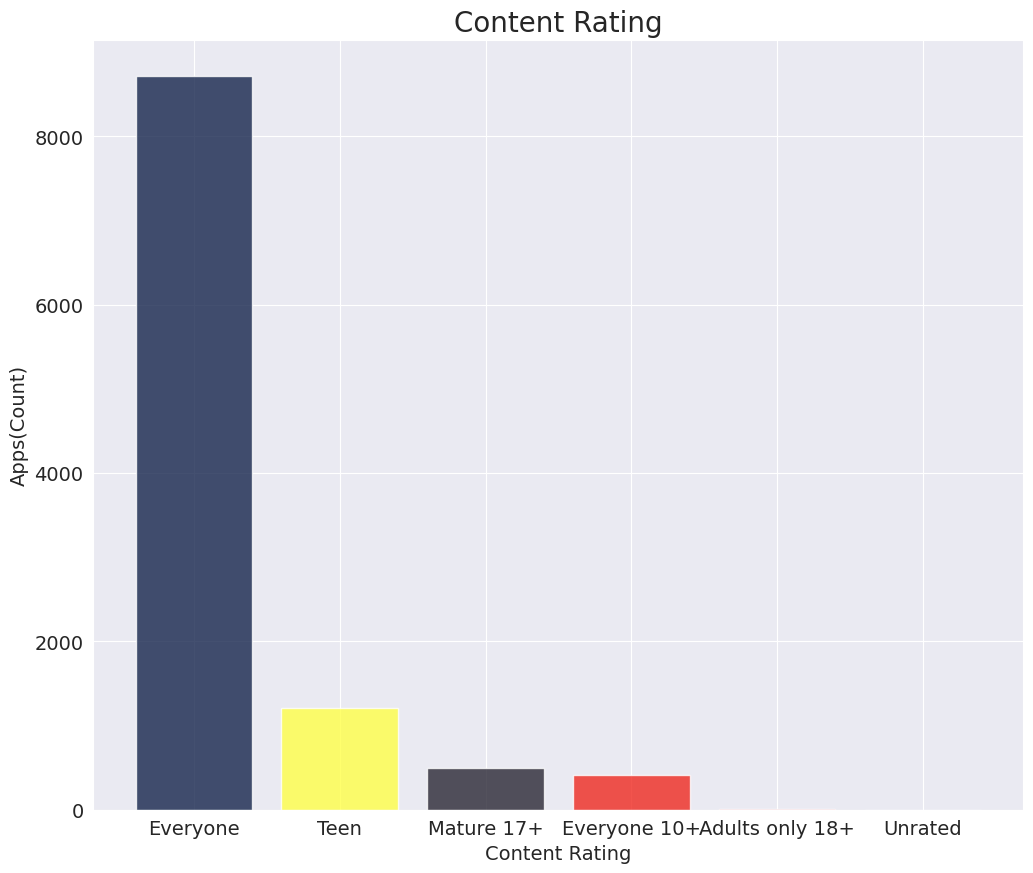

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(xaxis,yaxis,width=0.8,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

* **Note** :From the above plot we can see that Everyone category has the highest number of apps.*

## **3.How are the apps distributed?**

In [ ]:
df_ps['Rating'].describe()

count    10840.000000
mean         4.206476
std          0.480342
min          1.000000
25%          4.100000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

<ipython-input-64-0ea1aa3a5472>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  graph = sns.kdeplot(df_ps.Rating, color="Blue", shade = True)


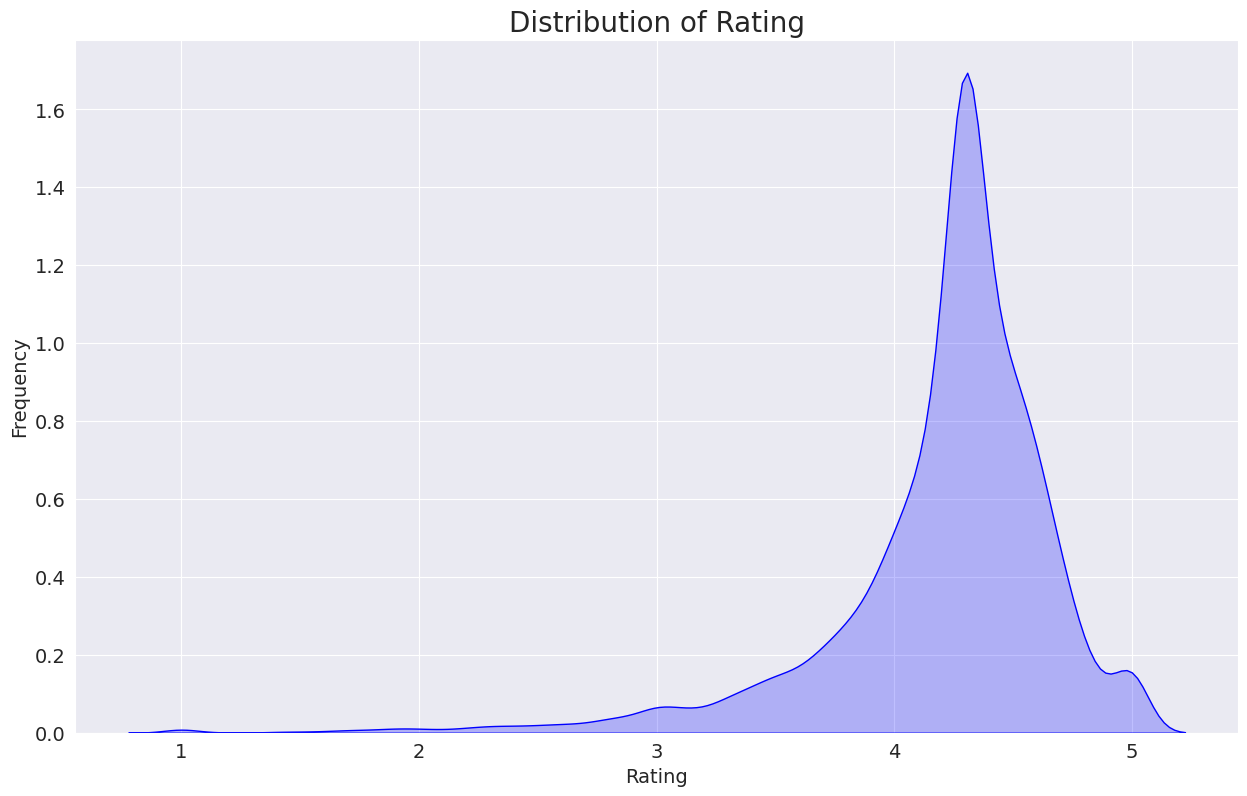

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(df_ps.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);


**Note:** From the above graph we can come to a conclusion that most of the apps in google playstore are rated in between 3.5 to 4.8

## **4. What percentage of the apps are paid and free?**


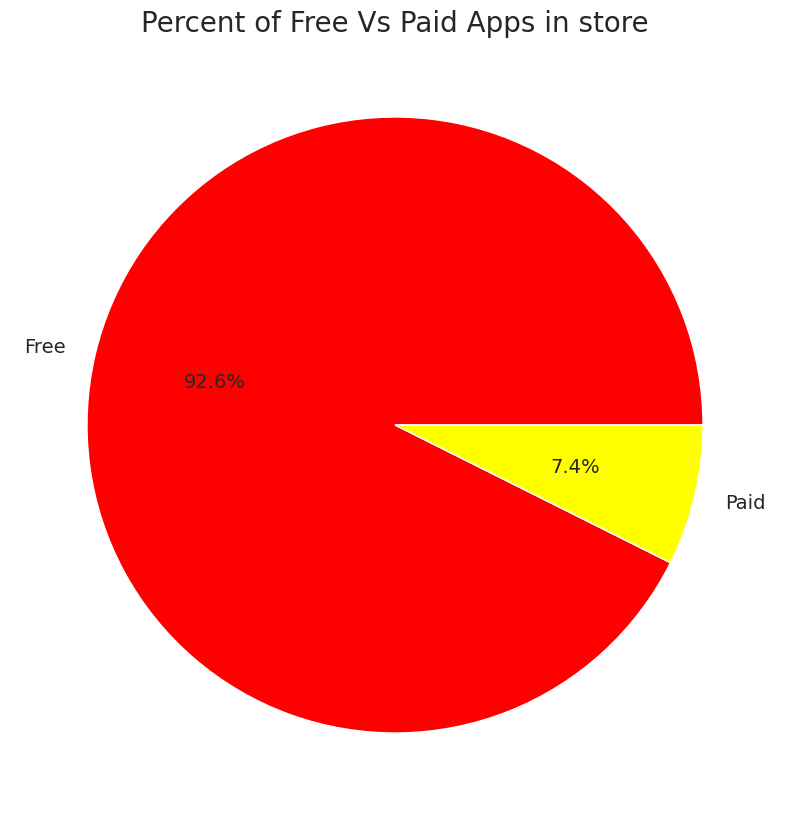

In [ ]:

plt.figure(figsize=(10,10))
labels = df_ps['Type'].value_counts(sort = True).index
sizes = df_ps['Type'].value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.2,0)
plt.pie(sizes, explode= None,labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

***Note:*** From the above graph we can see that 93%(Approx.) of apps in google play store are free and 7%(Approx.) are paid.


## **5. Which category of apps were installed more?**

In [ ]:
highest_Installs_df = df_ps.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)
#The above command will group the data by category and sort it in descending order

In [ ]:
highest_Installs_df.head()

,Installs
Category,
GAME,3.508602e+10
COMMUNICATION,3.264728e+10
PRODUCTIVITY,1.417609e+10
SOCIAL,1.406987e+10
TOOLS,1.145277e+10


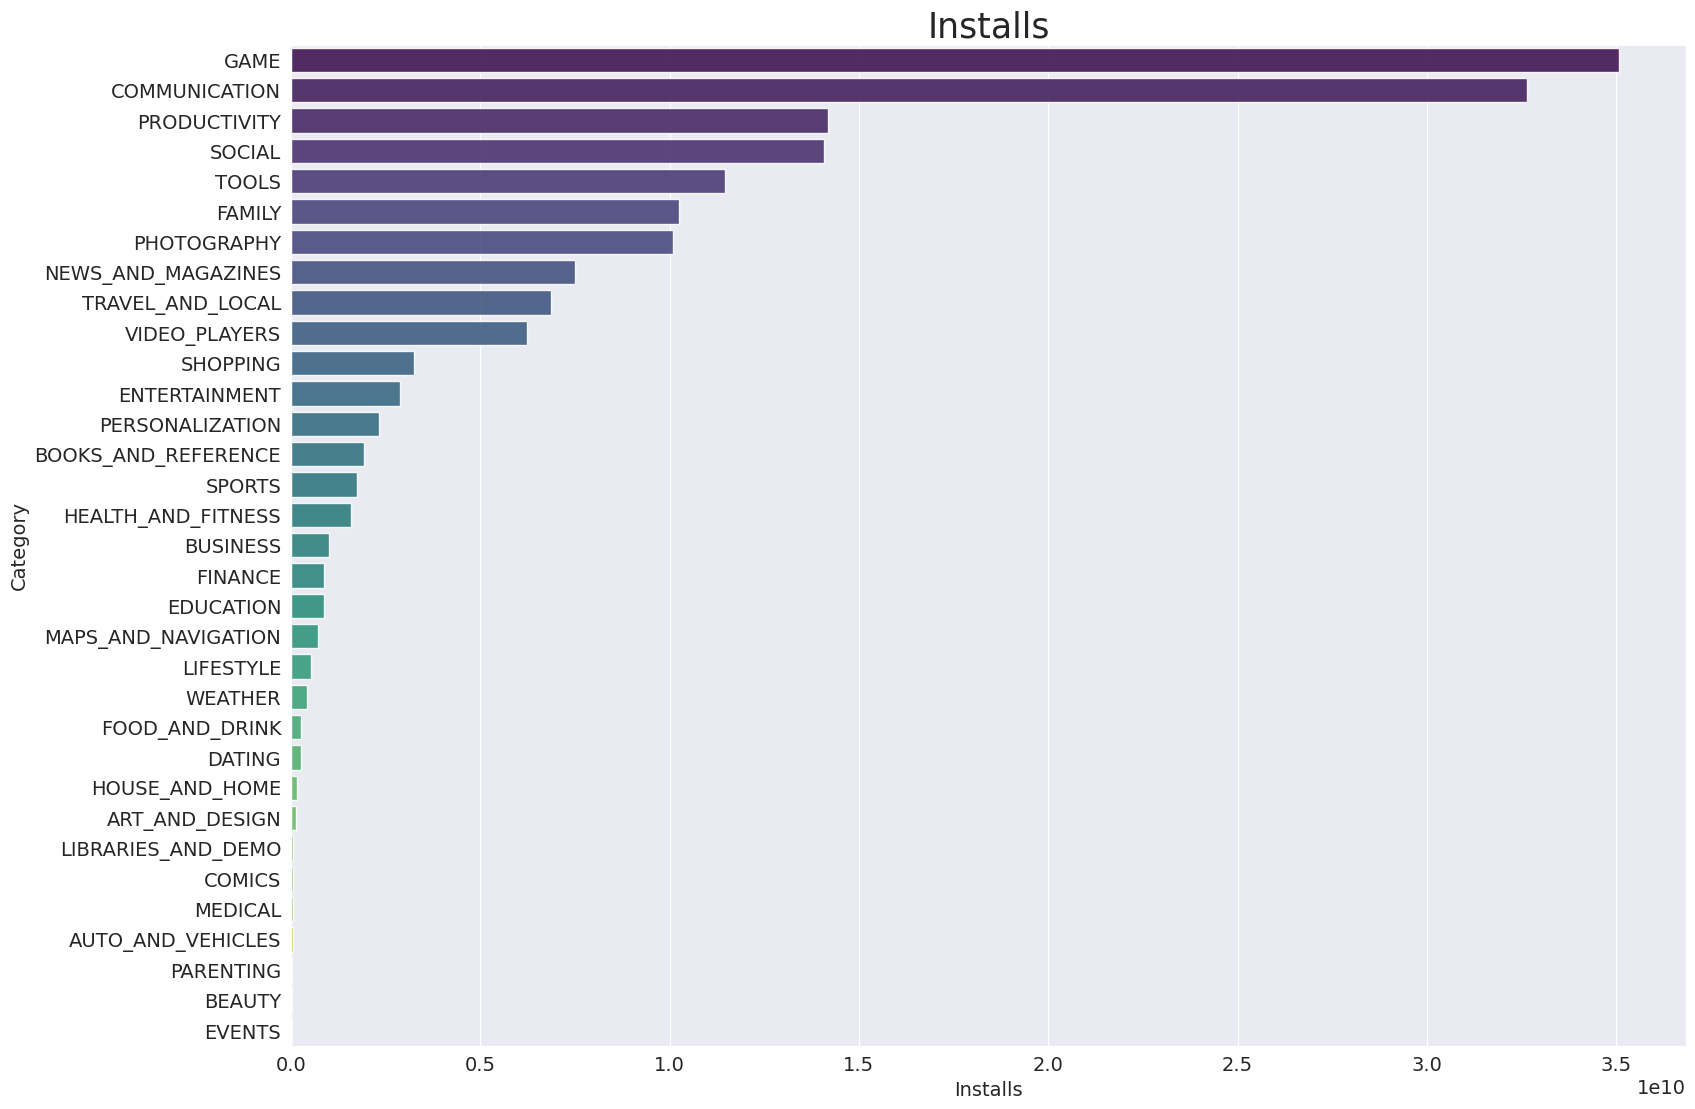

In [ ]:
xaxis = []
yaxis = []

for i in range(len(highest_Installs_df)):
    xaxis.append(highest_Installs_df.Installs[i])
    yaxis.append(highest_Installs_df.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Installs")
plt.ylabel("Category")
graph = sns.barplot(x = xaxis, y = yaxis, alpha =0.9, palette= "viridis")
graph.set_title("Installs", fontsize = 25);

**Note:** From the above visualization, it can be interpreted that the top categories with highest installs are Game,  Communication, Productivity,Social,Tools & Family,

## **6. Which are the top 10 paid Apps in playstore?**

In [ ]:
top10 = df_ps[df_ps['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
# top10PaidApps

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24456 (\N{CJK UNIFIED IDEOGRAPH-5F88}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 37666 (\N{CJK UNIFIED IDEOGRAPH-9322}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128142 (\N{GEM STONE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25105 (\N{CJK UNIFIED IDEOGRAPH-6211}) missing from

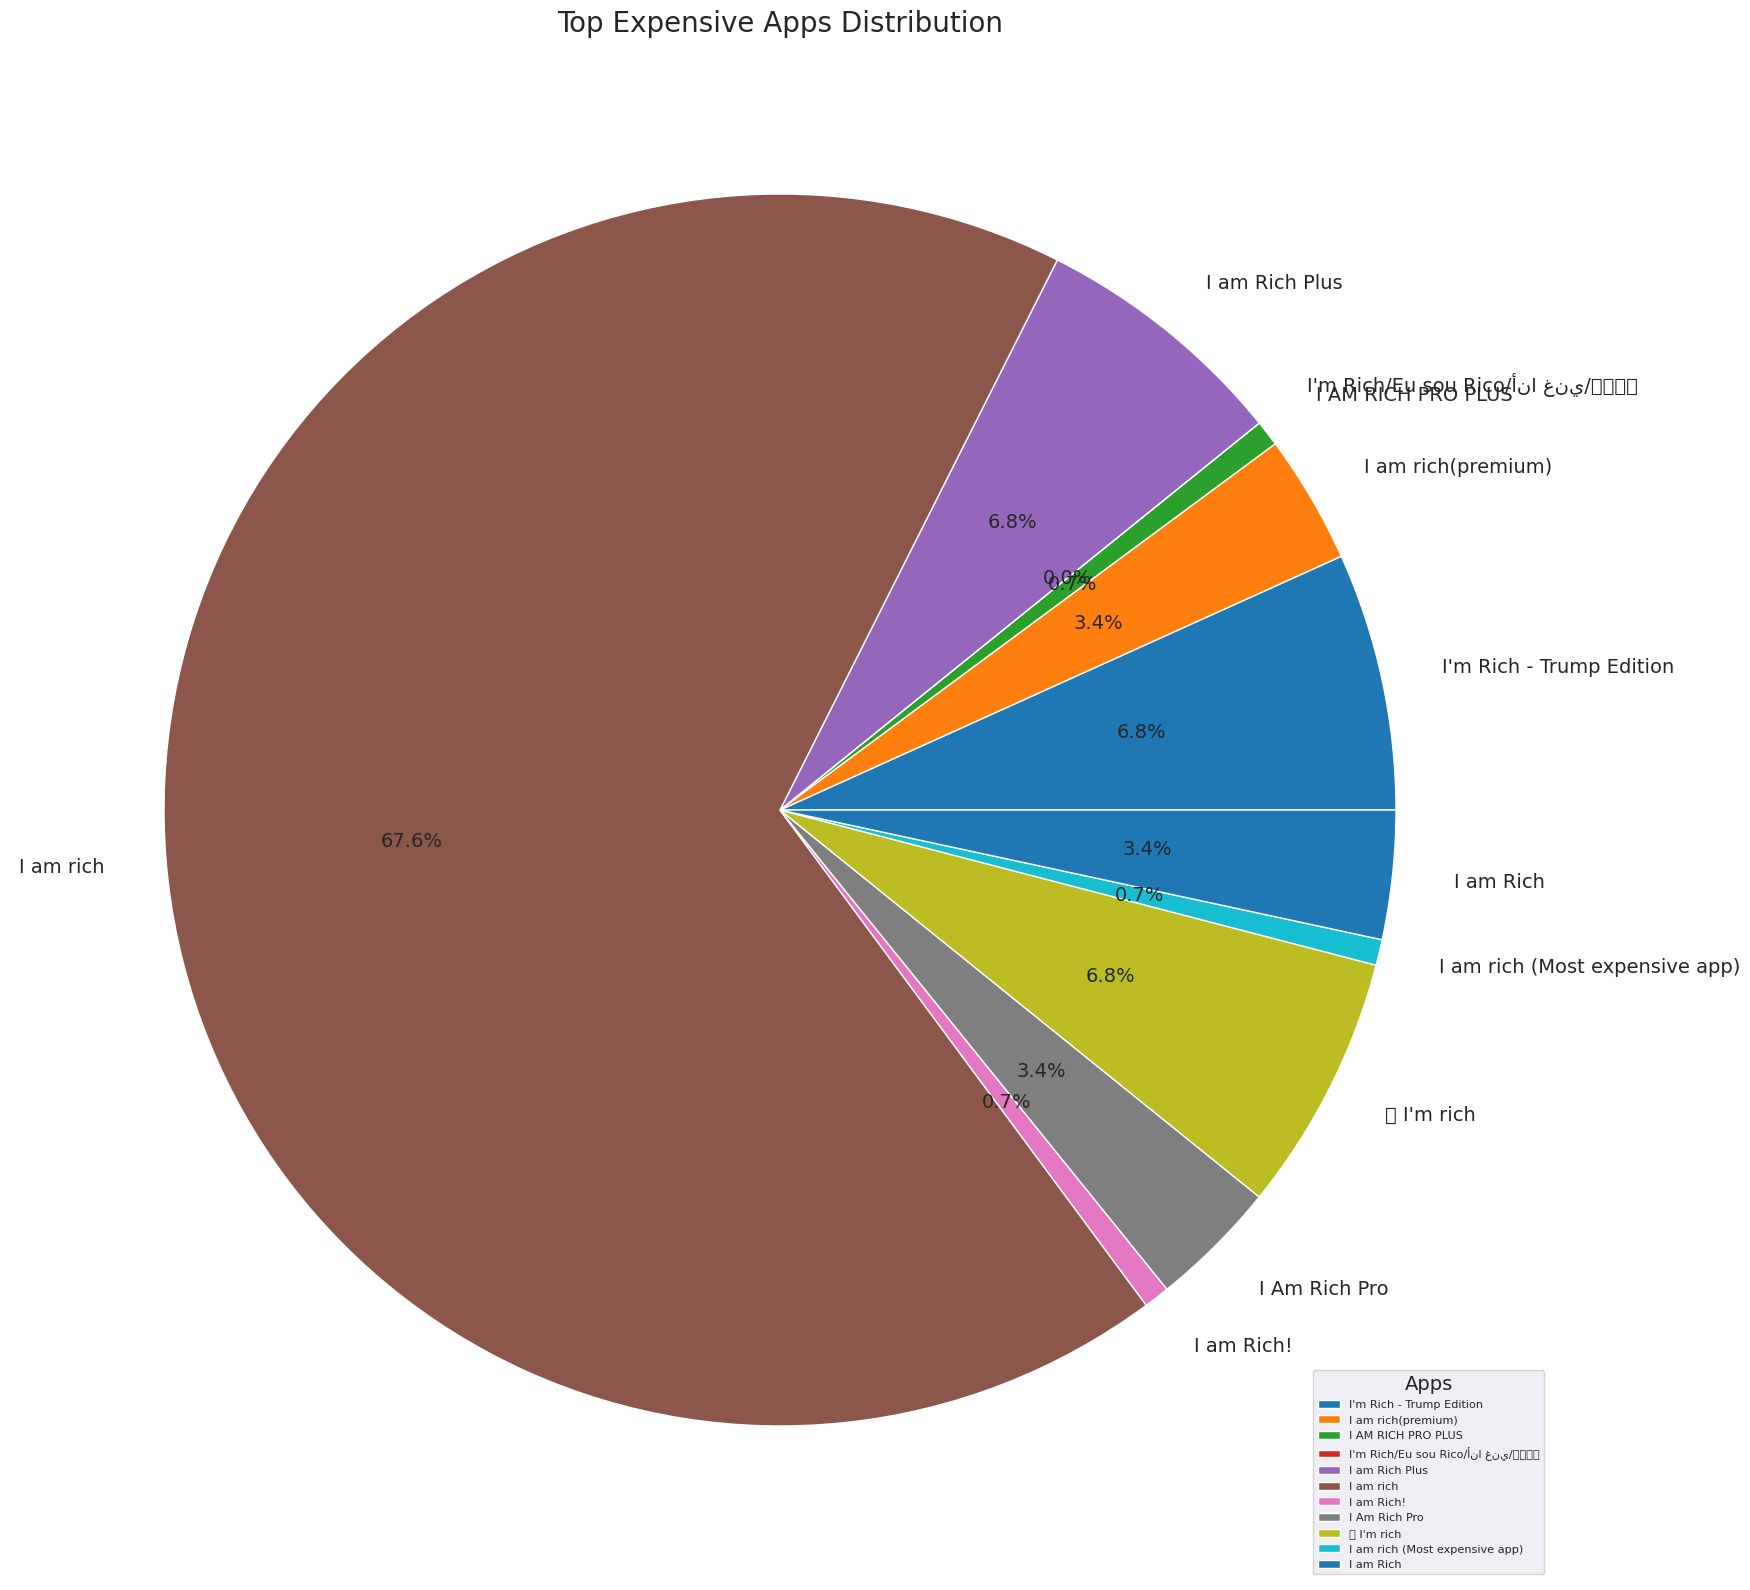

In [ ]:
plt.figure(figsize=(20,20));
plt.pie(top10.Installs, explode=None, labels=top10.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top10.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

Note: From the above graph we can interprete that the I am Rich app is the most expensive app in the google playstore.

## **7. Which are the Apps with highest number of reviews?**

In [ ]:
Apps_with_Highest_rev = df_ps.sort_values(by='Reviews', ascending=False).head(20)

In [ ]:
Apps_with_Highest_rev

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,NaN,1.000000e+09,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,NaN,1.000000e+09,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device


##**SUMMARY:**

 A complete market data analysis is a cornerstone of a successful app-making business.  All too often companies neglect to perform a thorough market analysis and are left to the bleak alternative of guesswork.  
Data analysis for app-making business helps to draw a near accurate marketing strategy. This means they can target the right audiences for your business with the correct blend of products or services. 
First of all the dataset and necessary libraries were loaded followed by cleaning of data which involved  filling the null values with median of the column. NaN values were identified and replaced. The data was then grouped by ‘Category’ and compared individually with three parameters: ‘Ratings’,’Reviews’ and ‘Price’. The outcome was plotted to see the trend. The required columns were converted from str to numeric type for ease of analysis. Then, seven questions were answered which would help an app-making business target the right audience, analyze the market and escalate its business. The selected questions for analysis were: What are the top categories as per the analysis? As per content rating which apps are ahead? How are the apps distributed? What size of apps are paid and free? Which category apps are installed more? And What are the top 10 paid apps?What are the apps with highest number of reviews?. The in-depth analysis of each question was done and results obtained which led to the following observations:
**Observation 1**: Family, finance and lifestyle apps are more expensive than others
**Observation 2**: Communication and social media apps have highest number of reviews
**Observation 3**: Education and events apps have highest ratings followed by arts and design
**Observation 4**: Difference between installation of paid and free apps is huge. Free apps were installed in much higher number than the paid apps
**Observation 5**: Family, Games followed by Tolls are the top categories as per the analysis
**Observation 6**: Apps with content for age group ‘Everyone’ are ahead of others in the race
**Observation 7**: 92.6% apps are free whereas only 7.4 percent are paid. 
**Observation 8**: ‘I am rice’ app is the most installed app. This is in accordance with the observation that finance apps are one of the most installed ones
